In [ ]:
!pip install sbi -qqq

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 99.5 MB/s eta 0:00:00
  

In [ ]:
from sbi.utils import BoxUniform
import torch
from sbi.inference import NPE

In [ ]:
# Define the likelihood (simulator)
num_dim = 3
def simulator(theta):
    # Linear Gaussian.
    return theta + 1.0 + torch.randn_like(theta) * 0.1

In [ ]:
prior = BoxUniform(low=-2 * torch.ones(num_dim), high=2 * torch.ones(num_dim))

In [ ]:
inference = NPE(prior=prior)

In [ ]:
num_simulations = 2000
theta = prior.sample((num_simulations,))
x = simulator(theta)
print("theta.shape", theta.shape)
print("x.shape", x.shape)

theta.shape torch.Size([2000, 3])
x.shape torch.Size([2000, 3])


In [ ]:
inference = inference.append_simulations(theta, x)
density_estimator = inference.train()

 Neural network successfully converged after 309 epochs.

In [ ]:
posterior = inference.build_posterior()


In [ ]:
x_obs = torch.tensor([2, 2, 2])


In [ ]:
samples = posterior.sample((10000,), x=x_obs)


  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
samples

tensor([[1.1185, 1.0573, 1.0883],
        [1.1860, 1.0041, 1.0840],
        [0.8943, 1.0930, 0.9159],
        ...,
        [0.8772, 1.0208, 0.9611],
        [0.9413, 1.0279, 0.9536],
        [1.2103, 0.9468, 1.0535]])

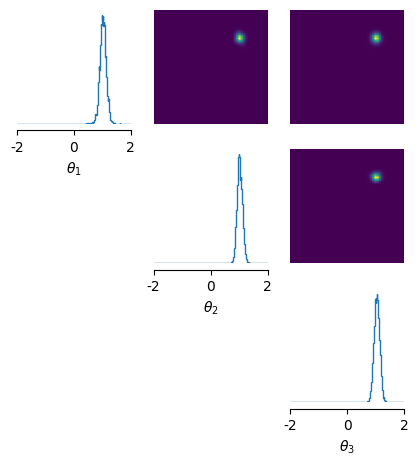

In [ ]:
from sbi.analysis import pairplot

_ = pairplot(
    samples,
    limits=[[-2, 2], [-2, 2], [-2, 2]],
    figsize=(5, 5),
    labels=[r"$\theta_1$", r"$\theta_2$", r"$\theta_3$"]
)

In [ ]:
# Define the likelihood (simulator)
num_dim = 2
def simulator(theta):
    return torch.normal(theta[:,0], theta[:,1])

In [ ]:
prior = BoxUniform(low=2 * torch.ones(num_dim), high=4 * torch.ones(num_dim))

In [ ]:
inference = NPE(prior=prior)

In [ ]:
num_simulations = 2000
theta = prior.sample((num_simulations,))
x = simulator(theta).reshape(-1,1)
print("theta.shape", theta.shape)
print("x.shape", x.shape)

theta.shape torch.Size([2000, 2])
x.shape torch.Size([2000, 1])


In [ ]:
theta

tensor([[2.3009, 3.5951],
        [3.5069, 2.6095],
        [2.9681, 3.6372],
        ...,
        [2.9062, 3.7310],
        [3.6760, 3.2912],
        [3.5031, 2.6242]])

In [ ]:
x

tensor([[8.7470],
        [3.5816],
        [6.4058],
        ...,
        [7.2744],
        [3.4618],
        [8.5060]])

In [ ]:
inference = inference.append_simulations(theta, x)
density_estimator = inference.train()

 Neural network successfully converged after 168 epochs.

In [ ]:
posterior = inference.build_posterior()

In [ ]:
x_obs = torch.tensor(3.9)

In [ ]:
samples = posterior.sample((10000,), x=x_obs)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
samples

tensor([[2.9759, 3.2152],
        [3.8009, 3.2564],
        [2.6394, 2.1618],
        ...,
        [2.7079, 2.7577],
        [3.8400, 3.3342],
        [3.5360, 3.0741]])

In [ ]:
from sbi.analysis import pairplot

_ = pairplot(
    samples,
    limits=[[2, 4], [2, 4]],
    figsize=(5, 5),
    labels=[r"$\mu$", r"$\sigma$"]
)

In [1]:
1+1

2